# Урок 7. Практическое задание

#### 1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.

In [100]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмём только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

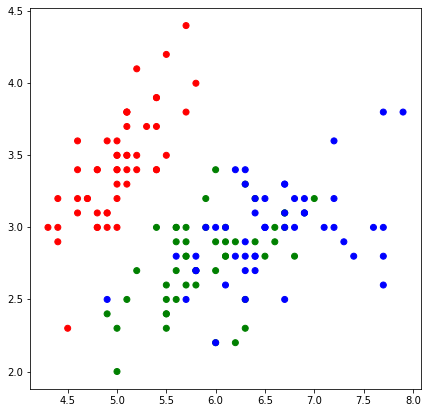

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [85]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчёт расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаём словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        dots = np.linspace(1, k, k)
        a = 1
        value = list(map(lambda d: 1 / (d + a), dots))

        # Сортируем список и среди первых k-элементов подсчитаем частоту появления разных классов
        # и добавляем к каждому классу свой вес value
        for d in sorted(test_distances)[0:k]:
            i = 0 
            classes[d[1]] += value[i]
            i += 1
        #    print (classes)
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [25]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [86]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


In [9]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчёт пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

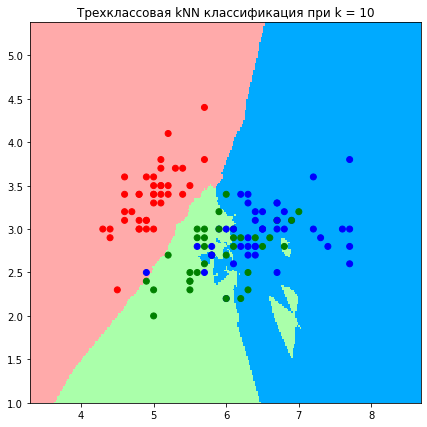

CPU times: user 1min 1s, sys: 725 ms, total: 1min 2s
Wall time: 1min 2s


In [65]:
%%time
get_graph(X_train, y_train, k)

In [87]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


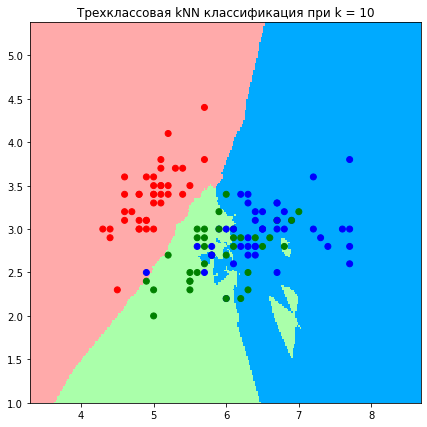

CPU times: user 59.2 s, sys: 326 ms, total: 59.6 s
Wall time: 59.9 s


In [12]:
%%time
get_graph(X_train, y_train, k)

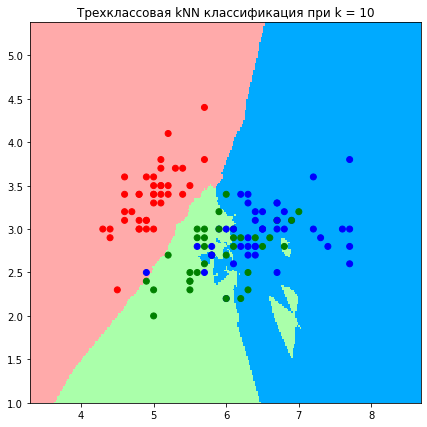

CPU times: user 1min 11s, sys: 991 ms, total: 1min 12s
Wall time: 1min 12s


In [70]:
%%time
get_graph(X_train, y_train, k)

#### 2. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

In [112]:
accuracy_rates = []
for k in range(1, 11, 1):
    y_pred = knn(X_train, y_train, X_test, k)
    accuracy_rates.append((accuracy(y_pred, y_test)))
accuracy_rates

[0.6666666666666666,
 0.6666666666666666,
 0.7333333333333333,
 0.8333333333333334,
 0.8666666666666667,
 0.8333333333333334,
 0.8,
 0.8,
 0.8666666666666667,
 0.8333333333333334]

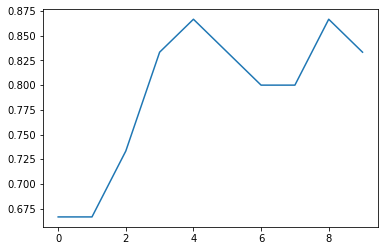

In [113]:
plt.plot(accuracy_rates)